# Функция Стыбинского-Танга

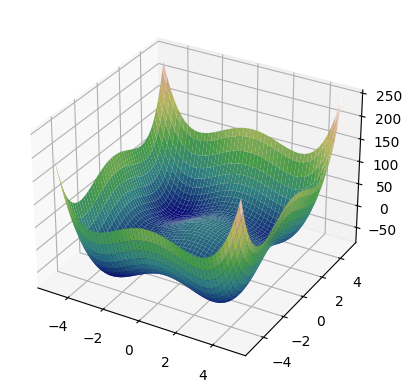

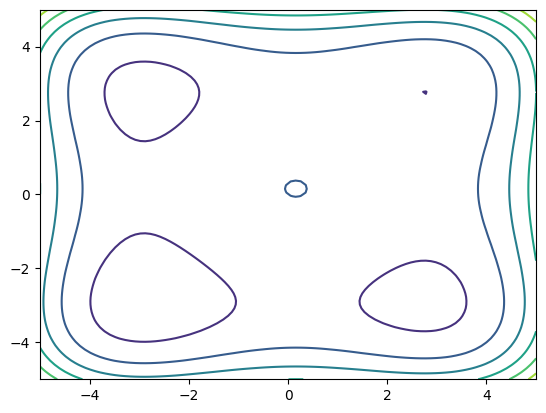

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


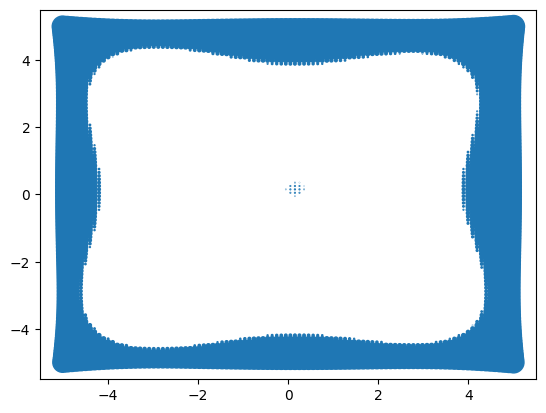

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def styblinski_tang(x):
  x1, x2 = x
  return 0.5 * ((x1**4 + x2**4) - 16 * (x1**2 + x2**2)+ 5 * (x1 + x2))

def styblinski_tang_2d_wrapper(x1, x2):
  return styblinski_tang([x1, x2])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z = np.array([styblinski_tang_2d_wrapper(xi, yi) for xi, yi in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

surface = ax.plot_surface(X, Y, Z, cmap='gist_earth')
plt.show()
plt.contour(X,Y,Z)
plt.show()
plt.scatter(X, Y, Z)
plt.show()

In [ ]:
!pip install scipy
!pip install geneticalgorithm
from scipy import optimize as opt
from geneticalgorithm import geneticalgorithm as ga

# Классический алгоритм оптимизации (Ньютона)

In [ ]:
import time

# Параметры для алгоритма Ньютона
initial_guess = [-2.9, -2.9]

newton_results = []

def jac_styblinski_tang(x):
  n = len(x)
  grad = 4 * x**3 - 32 * x + 5
  return grad

time_start = time.time()

for _ in range(100):
  res = opt.minimize(styblinski_tang, initial_guess, method='Newton-CG', jac=jac_styblinski_tang)
  newton_results.append(res.fun)

time_end_N = time.time()-time_start

# Эволюционный алгоритм оптимизации

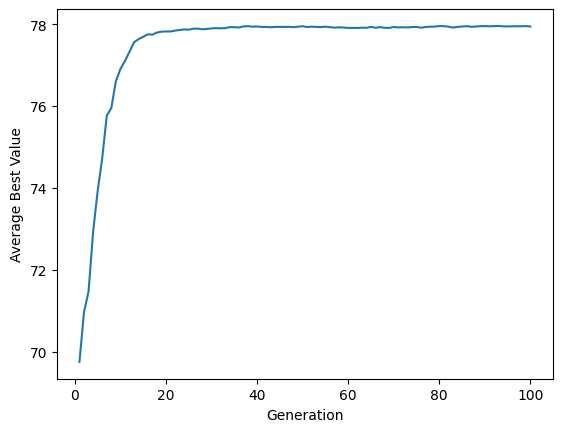

In [ ]:
import time

# Параметры для эволюционного алгоритма
population_size = 50
max_generations = 100
mutation_rate = 0.2
crossover_rate = 0.8

def evolutionary_optimization():
  # 1. Инициализация
  population = np.random.uniform(-5, 5, (population_size, 2))

  # Лучшие значения для каждого поколения
  best_values_per_generation = []

  for generation in range(max_generations):
    # 2. Оценка
    fitness_values = [-styblinski_tang(ind) for ind in population]

    # Коррекция фитнеса
    offset = min(fitness_values)
    fitness_values = [fv - offset for fv in fitness_values]

    # Нормализация вероятностей
    p = fitness_values / np.sum(fitness_values)

    # Сохрание лучшего значения для текущего поколения
    best_individual = population[np.argmax(fitness_values)]
    best_values_per_generation.append(-styblinski_tang(best_individual))

    # 3. Селекция
    selected = np.random.choice(population_size, size=population_size, p=p)

    # 4. Скрещивание
    children = []
    for i in range(0, population_size, 2):
      parent1, parent2 = population[selected[i]], population[selected[i+1]]
      child1, child2 = parent1.copy(), parent2.copy()
      if np.random.rand() < crossover_rate:
        crossover_point = np.random.randint(2)
        child1[:crossover_point], child2[:crossover_point] = parent2[:crossover_point], parent1[:crossover_point]
      children.extend((child1, child2))

    # 5. Мутация
    for child in children:
      if np.random.rand() < mutation_rate:
        mutation_point = np.random.randint(2)
        child[mutation_point] += np.random.uniform(-1, 1)

    # 6. Замена
    population = np.array(children)

  return best_individual, best_values_per_generation

evolutionary_final_results = []
all_generational_best_values = []

time_start = time.time()

for _ in range(100):
  best, best_values_per_generation = evolutionary_optimization()
  evolutionary_final_results.append(styblinski_tang(best))
  all_generational_best_values.append(best_values_per_generation)

time_end_E = time.time()-time_start

# Визуализация результатов
generations = list(range(1, max_generations + 1))
avg_best_values = np.mean(all_generational_best_values, axis=0)
plt.plot(generations, avg_best_values)
plt.xlabel('Generation')
plt.ylabel('Average Best Value')
plt.show()

# Анализ результатов

In [ ]:
newton_results = [x for x in newton_results if np.isfinite(x)]
evolutionary_results = [x for x in evolutionary_final_results if np.isfinite(x)]

print(newton_results[-3:])
print(evolutionary_results[-3:])

newton_mean = np.mean(newton_results)
newton_variance = np.var(newton_results)
evolutionary_mean = np.mean(evolutionary_results)
evolutionary_variance = np.var(evolutionary_results)

data = {
  'Algorithm': ['Newton', 'Evolutionary'],
  'Mean': [newton_mean, evolutionary_mean],
  'Variance': [newton_variance, evolutionary_variance],
  'Time': [time_end_N, time_end_E]
}

df = pd.DataFrame(data)
df

[-78.33233140754284, -78.33233140754284, -78.33233140754284]
[-78.3137438411273, -78.04426264141838, -78.32625268074476]


,Algorithm,Mean,Variance,Time
0,Newton,-78.332331,2.019484e-28,0.041666
1,Evolutionary,-77.942352,3.881104e+00,8.686599


In [ ]:
!pip install sklearn-genetic-opt

# RF-классификатор

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

data = load_digits()

n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

clf = RandomForestClassifier()

In [ ]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30),
              'max_leaf_nodes': Integer(2, 35),
              'n_estimators': Integer(100, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.842666	0.0650605  	0.935082   	0.691972   
1  	20    	0.894803	0.0385238  	0.936913   	0.840523   
2  	17    	0.894075	0.0264025  	0.931357   	0.85898    
3  	17    	0.914655	0.0200772  	0.931357   	0.87935    
4  	18    	0.925433	0.0135846  	0.931388   	0.884968   
5  	17    	0.933944	0.00445399 	0.944269   	0.931357   
6  	17    	0.937638	0.00595985 	0.944269   	0.927685   
7  	20    	0.933574	0.00572417 	0.944269   	0.92576    
8  	17    	0.933957	0.00424463 	0.942499   	0.929505   
9  	19    	0.937855	0.00617267 	0.946214   	0.927643   
10 	19    	0.938972	0.00672405 	0.946214   	0.92394    
11 	18    	0.941188	0.00612314 	0.946214   	0.931306   
12 	16    	0.938775	0.00556875 	0.946214   	0.929495   
13 	19    	0.938214	0.00592652 	0.946214   	0.927664   
14 	19    	0.939529	0.00675162 	0.946214   	0.927664   
15 	18    	0.938964	0.0065595  	0.946214   	0.927664   
16 	19    	0.942495	0.00234571 	0.946214   	0.93

0.9379968203497615

In [ ]:
evolved_estimator.best_params_

{'min_weight_fraction_leaf': 0.015372894528567802,
 'bootstrap': False,
 'max_depth': 13,
 'max_leaf_nodes': 31,
 'n_estimators': 244}

/usr/local/lib/python3.10/dist-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


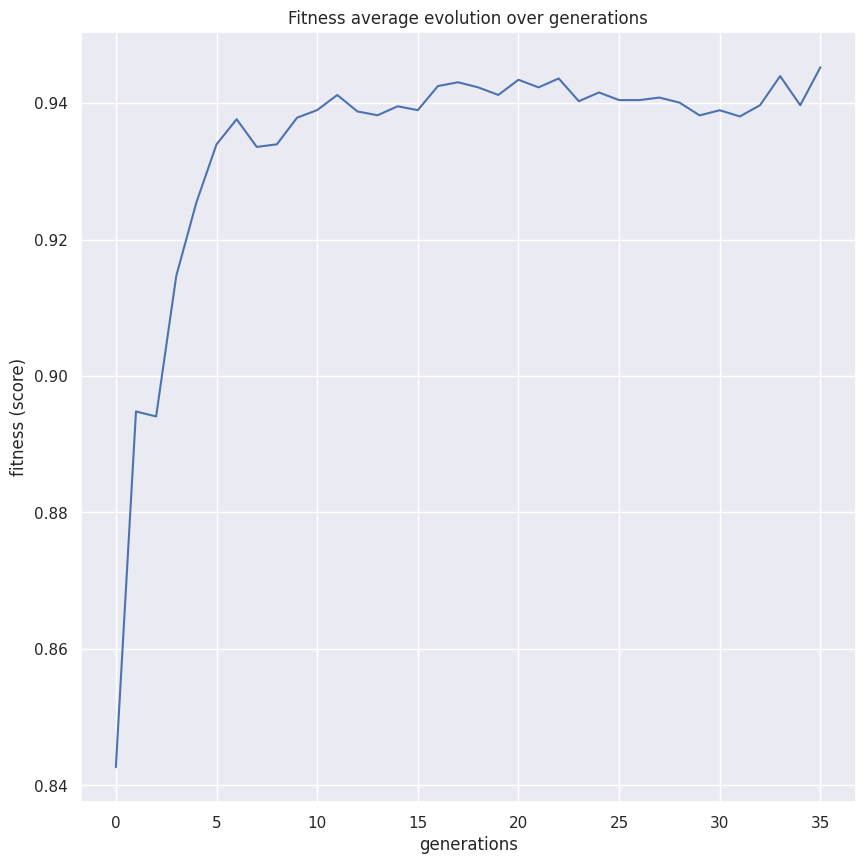

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()

# SVM-классификатор

In [ ]:
data = load_digits()

n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
from random import randint
import scipy.stats as sts
import plotly.express as px
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {'kernel': Categorical(['linear', 'rbf', 'poly', 'sigmoid']),
              'C': Integer(1,10)}
model=SVC()

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=model,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=parameters,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.938777	0.0390939  	0.968456   	0.870153   
1  	18    	0.965118	0.00307968 	0.970288   	0.961028   
2  	15    	0.971605	0.00250536 	0.975905   	0.968467   
3  	19    	0.971987	0.00385177 	0.975905   	0.964773   
4  	17    	0.975527	0.000757294	0.975905   	0.974012   
5  	16    	0.974594	0.0022079  	0.975905   	0.968477   
6  	19    	0.971444	0.00491884 	0.975905   	0.962922   
7  	20    	0.973659	0.00232745 	0.975905   	0.970277   
8  	20    	0.973289	0.00252712 	0.975905   	0.968425   
9  	17    	0.972927	0.00425674 	0.975905   	0.964722   
10 	16    	0.975153	0.0027838  	0.977757   	0.968477   
11 	19    	0.976457	0.00145324 	0.977757   	0.974033   
12 	19    	0.975716	0.00241505 	0.977757   	0.970329   
13 	20    	0.974973	0.00425306 	0.977757   	0.964763   
14 	18    	0.977385	0.000744893	0.977757   	0.975885   
15 	19    	0.974225	0.00434933 	0.977757   	0.964773   
16 	17    	0.973297	0.00399815 	0.977757   	0.96

0.9785373608903021

In [ ]:
evolved_estimator.best_params_

{'kernel': 'rbf', 'C': 7}

/usr/local/lib/python3.10/dist-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


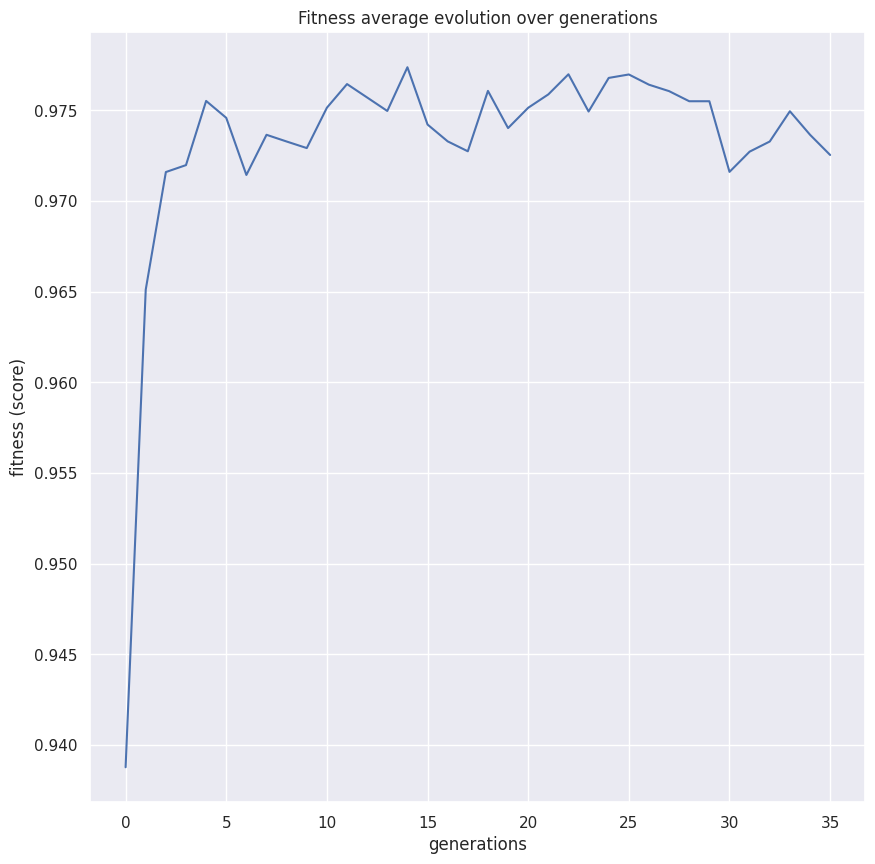

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()

# K-means-классификатор

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
data = load_digits()

n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [ ]:
parameters = {'n_neighbors': Integer(3,10),
              'leaf_size': Integer(3,50)}
model=KNeighborsClassifier()

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=model,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=parameters,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.946382	0.00902572 	0.970308   	0.938806   
1  	18    	0.94974 	0.00882761 	0.970308   	0.938775   
2  	16    	0.952882	0.00390939 	0.961028   	0.948045   
3  	18    	0.956595	0.00605499 	0.964763   	0.948014   
4  	20    	0.962903	0.00563844 	0.970339   	0.948034   
5  	18    	0.967541	0.00364416 	0.975895   	0.962901   
6  	18    	0.970689	0.00378976 	0.975895   	0.966594   
7  	18    	0.972734	0.00322337 	0.975895   	0.966615   
8  	19    	0.972926	0.00354092 	0.975895   	0.964753   
9  	18    	0.972925	0.00251641 	0.975895   	0.970329   
10 	18    	0.974405	0.00216461 	0.975895   	0.970329   
11 	19    	0.97422 	0.00304913 	0.975895   	0.966594   
12 	17    	0.975522	0.00181613 	0.977736   	0.970329   
13 	16    	0.974964	0.0029016  	0.977736   	0.968487   
14 	18    	0.97478 	0.00301438 	0.977736   	0.966615   
15 	16    	0.974595	0.00204165 	0.975895   	0.970329   
16 	18    	0.972737	0.00431563 	0.975895   	0.96

0.972972972972973

In [ ]:
evolved_estimator.best_params_

{'n_neighbors': 3, 'leaf_size': 42}

/usr/local/lib/python3.10/dist-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


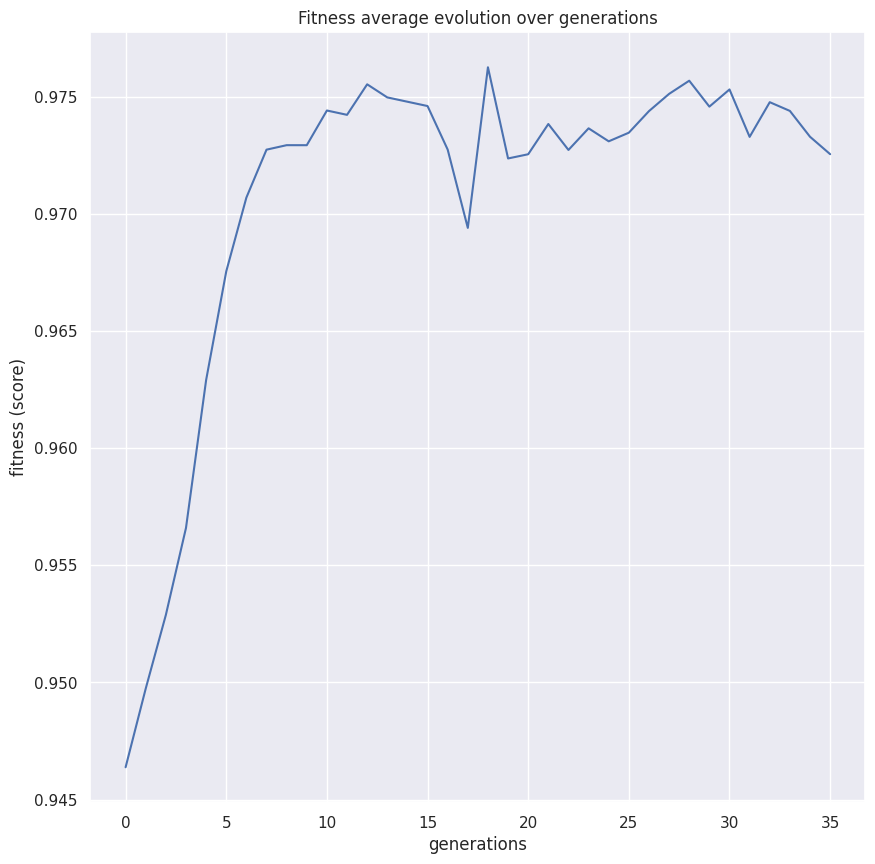

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()